<center><h1>Machine Learning </h1></center>

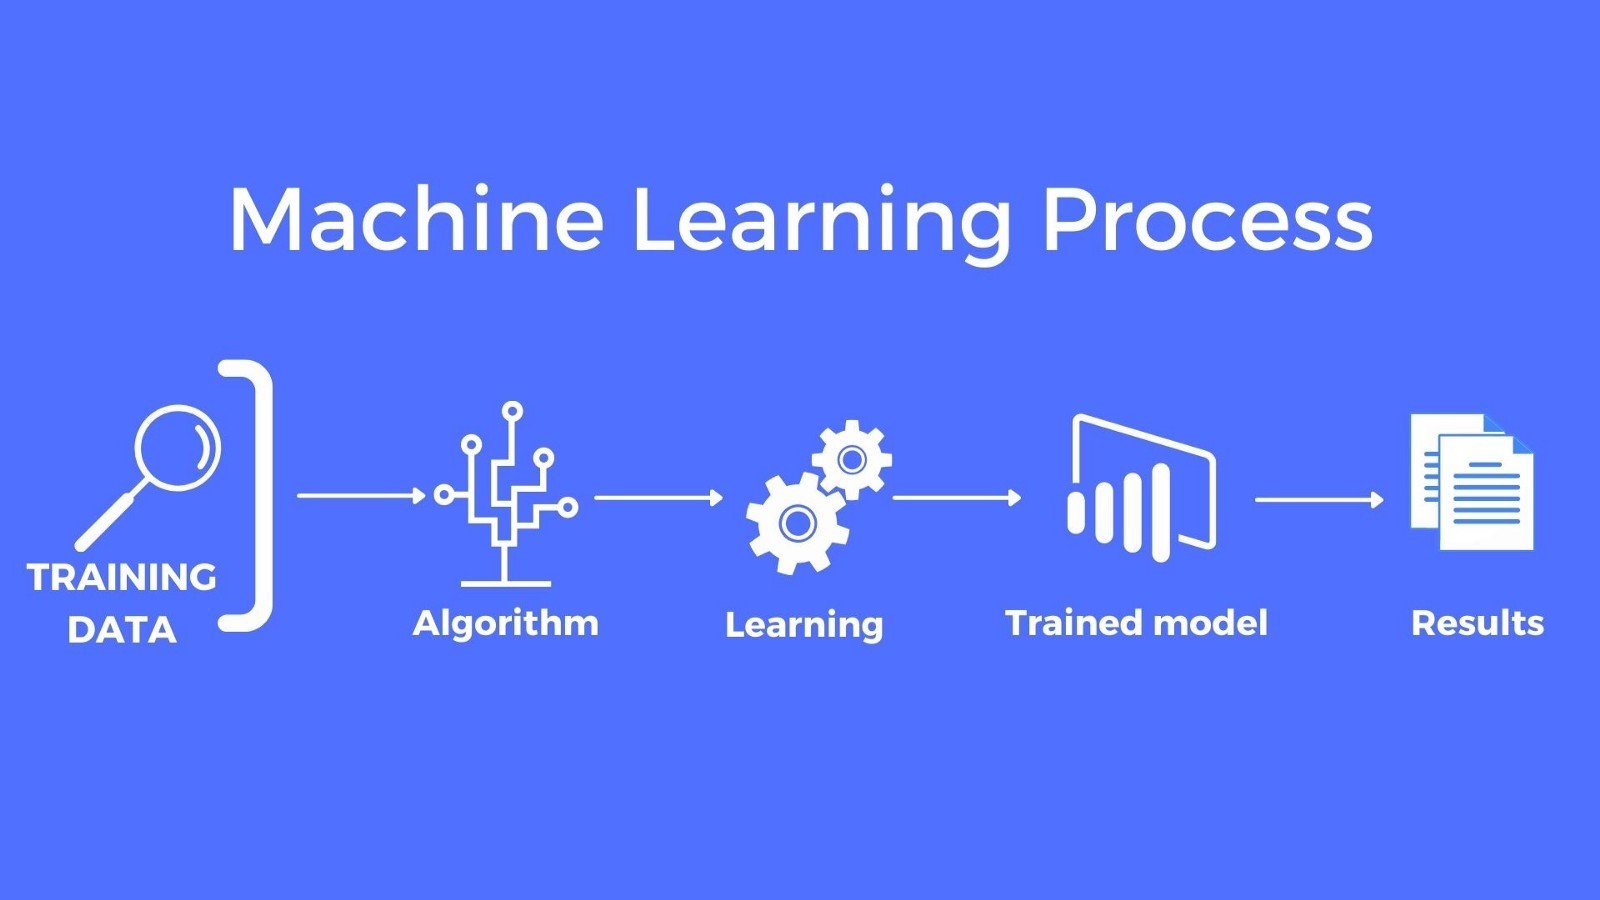

There are several machine-learning methods available at the moment. <br>
In this notebook, I will exhibit the following:
- Supervised
- Unsupervised
- Semi-supervised 
- Active
<br> <br>
Moreover, we will perform Monte-Carlo Simulation to enhance our result.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.special import softmax

In [3]:
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

## Data

* For all the example below, we will use the Breast Cancer Wisconsin (Diagnostic) Data Set from UCI.

Here, we perform some pre-processing to make data more usable. <br>
We have 10 features:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Concave Points
- Symmetry
- Fractal Dimension

However, we will turn this 10 column into 30 by using the column's mean, std, and worst value.

In [4]:
def make_column_name():
    column_list = []
    ten_column = ['Radius','Texture','Perimeter','Area','Smoothness','Compactness','Concavity','Concave Points','Symmetry','Fractal Dimension']
    column_list.append('ID')
    column_list.append('Diagnosis')
    counter = 0
    for i in range(0,3,1):
        for j in range(0,10,1):
            if counter == 0:
                temp = ten_column[j] + " (mean)"
                column_list.append(temp)
            elif counter == 1:
                temp = ten_column[j] + " (std)"
                column_list.append(temp)
            else:
                temp = ten_column[j] + " (worst)"
                column_list.append(temp)
        
        counter += 1
        
    return column_list

In [5]:
temp_list = []
f = open('../data/wdbc.data','rt')
for line in f:
    temp_list.append(line)

f.close()

wdbc_list = []
for i in temp_list:
    temp = i.strip('\n').split(',')
    wdbc_list.append(temp)
    
temp_list.clear()
df_wdbc = pd.DataFrame(wdbc_list,columns = make_column_name())
for j in df_wdbc.columns[2:]:
    df_wdbc[j] = df_wdbc[j].astype('float64')
df_wdbc.drop(['ID'], axis=1,inplace=True)

le = LabelEncoder()
le = le.fit(["B","M"])
diagnosis_le = le.transform(df_wdbc['Diagnosis'])
df_wdbc['Diagnosis'] = diagnosis_le

In [6]:
df_wdbc.head(10)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave Points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave Points (worst),Symmetry (worst),Fractal Dimension (worst)
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# 1. Supervised

Our goal is to train an L1-penalized SVM to classify the data. <br>
Other aspects:
- will use 5 fold cross validation to choose the penalty parameter. U
- will use normalized data. 
- will use various metrics (accuracy, precision, recall, F1-score, and AUC)

#### def score_list(y_train, y_test, y_pred_train, y_pred_test, y_pred_proba_train, y_pred_proba_test): 
<br>
This function generates the metrics to be able to be seen in one glance.

In [7]:
def score_list(y_train, y_test, y_pred_train, y_pred_test, y_pred_proba_train, y_pred_proba_test):
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_proba_train)
    
    train_score_list = [train_accuracy, train_precision, train_recall, train_f1, train_auc]
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    test_score_list = [test_accuracy, test_precision, test_recall, test_f1, test_auc]
    
    return train_score_list, test_score_list

### L1- Penalized SVM

As we all know, overfitting is one of the dangers of machine learning. <br>
One leading factor to an overfitting can be the model's complexity. <br>
Therefore, to cut off some unnecessary branches (variables) and reduce complexity, I will be using L1 penalty. <br>
L1 penalty will reduce the weight of the uninformative variables to basically a zero, thus eliminating some complexity. <br><br>

We have a list of penalty value, and we will perform monte-carlo simulation, as well as n-fold to determine the best penalty value. <br>
- We will be normalizing our inputs with MinMaxScaler().

In [8]:
penalty_list = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

def supervised_monte_carlo():
    train_score_list = []
    test_score_list = []
    for i in range(0,30,1):
        X_train, X_test, y_train, y_test = train_test_split(df_wdbc.iloc[:,1:], df_wdbc.iloc[:,0] ,
                                                            train_size=0.8, stratify=df_wdbc.iloc[:,0])
        scaler = MinMaxScaler()
        scaler = scaler.fit(X_train)
        df_X_train = pd.DataFrame(scaler.transform(X_train))
        df_X_train.columns = make_column_name()[2:]
        df_X_test = pd.DataFrame(scaler.transform(X_test))
        df_X_test.columns = make_column_name()[2:]

        lin_svc = LinearSVC(penalty='l1',dual=False,max_iter=100000)
        lin_svc_parameters = {'C':penalty_list}
        lin_svc_grid_search = GridSearchCV(lin_svc, lin_svc_parameters, cv=KFold(n_splits=5),n_jobs=-1).fit(df_X_train, y_train)  
        lin_svc_modified = LinearSVC(penalty = 'l1', dual=False, 
                                     max_iter= 100000, C = lin_svc_grid_search.best_params_["C"]).fit(df_X_train, y_train)

        y_pred_train = lin_svc_modified.predict(df_X_train)
        y_pred_test = lin_svc_modified.predict(df_X_test)
        y_pred_proba_train = lin_svc_modified.decision_function(df_X_train)
        y_pred_proba_test = lin_svc_modified.decision_function(df_X_test)

        train_score = score_list(y_train, y_test, y_pred_train, y_pred_test,y_pred_proba_train, y_pred_proba_test)[0]
        test_score = score_list(y_train, y_test, y_pred_train, y_pred_test,y_pred_proba_train, y_pred_proba_test)[1]
        train_score_list.append(train_score)
        test_score_list.append(test_score)

        if i == 0:
            print("For Training data: ")
            print()
            print("ROC: ")
            fpr_train, tpr_train, __train = roc_curve(y_train, y_pred_proba_train)
            plt.plot(fpr_train, tpr_train, marker='.',label='Training')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_train, y_pred_train))
            print()

            print("For Test data: ")
            print()
            print("ROC: ")
            fpr_test, tpr_test, _test = roc_curve(y_test, y_pred_proba_test)
            plt.plot(fpr_test, tpr_test, marker='.',label="Test")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_test, y_pred_test))
            
    return train_score_list, test_score_list

For Training data: 

ROC: 


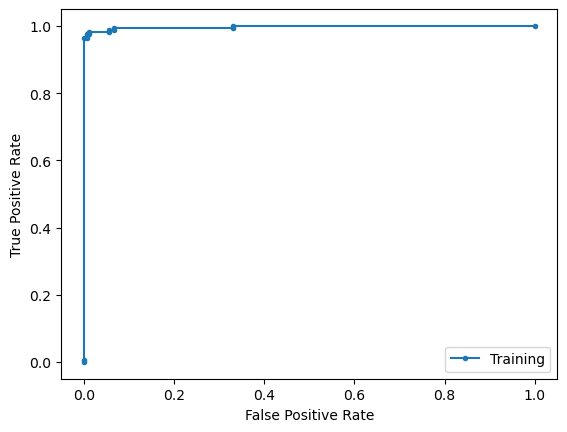


Confusion Matrix: 
[[283   2]
 [  5 165]]

For Test data: 

ROC: 


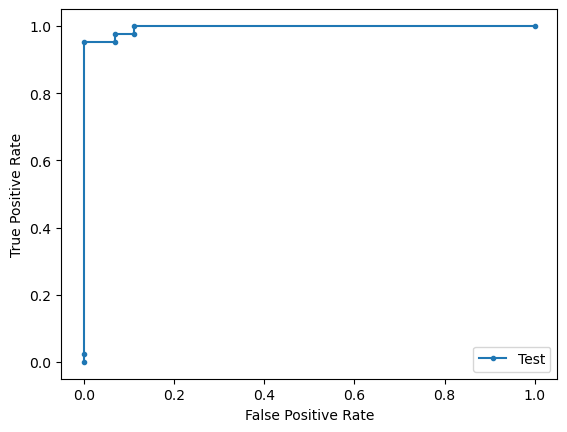


Confusion Matrix: 
[[72  0]
 [ 3 39]]


In [9]:
column_list = ['Accuracy','Precision','Recall','F1','AUC']
result = supervised_monte_carlo()
df_supervised_train = pd.DataFrame(result[0], columns = column_list)
df_supervised_test = pd.DataFrame(result[1], columns= column_list)

In [10]:
df_supervised_train.mean()

Accuracy     0.984469
Precision    0.989415
Recall       0.968824
F1           0.978989
AUC          0.997198
dtype: float64

In [11]:
df_supervised_test.mean()

Accuracy     0.972515
Precision    0.980076
Recall       0.945238
F1           0.961958
AUC          0.993948
dtype: float64

## Conclusion for Supervised

We can see that the model's metrics do fall for the test set. However, that is not a big concern since our metrics for the test data show promising results. <br>
The fact that our metrics are decent throughout shows that our model is pretty robust, proven by high score in F1 and AUC. 

# 2. Semi-Supervised 

Here, we will select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.

In [12]:
def semi_supervised_monte_carlo():
    train_score_list = []
    test_score_list = []

    for i in range(0,30,1):
        X_train, X_test, y_train, y_test = train_test_split(df_wdbc.iloc[:,1:], df_wdbc.iloc[:,0] ,train_size=0.8, stratify=df_wdbc.iloc[:,0])
        scaler = MinMaxScaler()
        scaler = scaler.fit(X_train)
        df_X_train = pd.DataFrame(scaler.transform(X_train))
        df_X_train.columns = make_column_name()[2:]
        df_X_test = pd.DataFrame(scaler.transform(X_test))
        df_X_test.columns = make_column_name()[2:]
        X_train_labeled, X_train_unlabeled, y_train_labeled, y_train_unlabeled = train_test_split(df_X_train, y_train, train_size = 0.5
                                                                                                  , stratify = y_train)

        X_train_unlabeled = X_train_unlabeled.reset_index(drop=True)
        y_train_unlabeled = y_train_unlabeled.reset_index(drop=True)
        
        lin_svc = LinearSVC(penalty='l1',dual=False,max_iter=100000)
        lin_svc_parameters = {'C':penalty_list}
        counter = len(X_train_unlabeled)
        while counter > 0:
            lin_svc_grid_search = GridSearchCV(lin_svc, lin_svc_parameters, 
                                               cv=KFold(n_splits=5),n_jobs=-1).fit(X_train_labeled, y_train_labeled)  
            lin_svc_modified = LinearSVC(penalty = 'l1', 
                                         dual=False, max_iter= 100000, 
                                         C = lin_svc_grid_search.best_params_["C"]).fit(X_train_labeled, y_train_labeled) 
            
            distance = lin_svc_modified.decision_function(X_train_unlabeled)
            abs_max = np.abs(distance).max()
            abs_max_index = np.where((distance == abs_max) | (distance == -1 * abs_max))[0][0]
            new_x_point = X_train_unlabeled.iloc[abs_max_index,:]
            new_y_point = lin_svc_modified.predict(pd.DataFrame(new_x_point).T)

            X_train_labeled  = X_train_labeled.append(new_x_point.T)
            y_train_labeled = y_train_labeled.append(pd.Series(new_y_point))
            y_train_labeled.name = 'Diagnosis'
            
            X_train_unlabeled = X_train_unlabeled.drop([abs_max_index])
            y_train_unlabeled = y_train_unlabeled.drop([abs_max_index])
            X_train_unlabeled = X_train_unlabeled.reset_index(drop=True)
            y_train_unlabeled = y_train_unlabeled.reset_index(drop=True)
            
            counter -= 1
            
        lin_svc_grid_search = GridSearchCV(lin_svc, lin_svc_parameters, 
                                           cv=KFold(n_splits=5),n_jobs=-1).fit(X_train_labeled, y_train_labeled)  
        lin_svc_final = LinearSVC(penalty = 'l1', dual=False, max_iter= 100000, 
                                  C = lin_svc_grid_search.best_params_["C"]).fit(X_train_labeled, y_train_labeled) 
        
        y_pred_train = lin_svc_final.predict(df_X_train)
        y_pred_test = lin_svc_final.predict(df_X_test)
        y_pred_proba_train = lin_svc_final.decision_function(df_X_train)
        y_pred_proba_test = lin_svc_final.decision_function(df_X_test)

        train_score = score_list(y_train, y_test, y_pred_train, y_pred_test,y_pred_proba_train, y_pred_proba_test)[0]
        test_score = score_list(y_train, y_test, y_pred_train, y_pred_test,y_pred_proba_train, y_pred_proba_test)[1]

        train_score_list.append(train_score)
        test_score_list.append(test_score)

        if i == 0:
            print("For Training data: ")
            print()
            print("ROC: ")
            fpr_train, tpr_train, __train = roc_curve(y_train, y_pred_proba_train)
            plt.plot(fpr_train, tpr_train, marker='.',label='Training')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_train, y_pred_train))
            print()

            print("For Test data: ")
            print()
            print("ROC: ")
            fpr_test, tpr_test, _test = roc_curve(y_test, y_pred_proba_test)
            plt.plot(fpr_test, tpr_test, marker='.',label="Test")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_test, y_pred_test))
            
    return train_score_list, test_score_list

For Training data: 

ROC: 


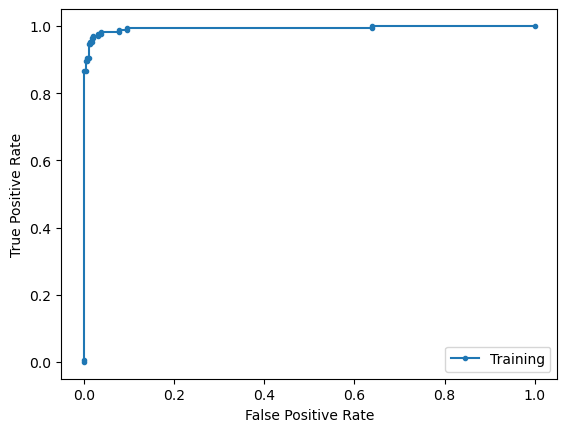


Confusion Matrix: 
[[281   4]
 [  9 161]]

For Test data: 

ROC: 


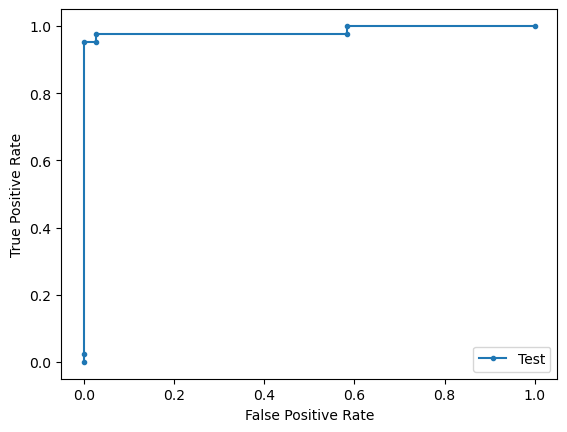


Confusion Matrix: 
[[72  0]
 [ 3 39]]


In [13]:
semi_result = semi_supervised_monte_carlo()

In [14]:
df_semi_train = pd.DataFrame(semi_result[0], columns = column_list)
df_semi_test = pd.DataFrame(semi_result[1], columns= column_list)

In [15]:
df_semi_train.mean()

Accuracy     0.976630
Precision    0.983536
Recall       0.953529
F1           0.968216
AUC          0.994549
dtype: float64

In [16]:
df_semi_test.mean()

Accuracy     0.966082
Precision    0.967784
Recall       0.940476
F1           0.953160
AUC          0.989517
dtype: float64

# 3. Unsupervised Learning

We will run k-means algorithm on the whole training set (k = 2).

In [17]:
def find_closest(cluster_list):
    df = pd.DataFrame(cluster_list).T
    df.columns = ['Cluster_1','Cluster_2']
    
    df1 = df.sort_values(by='Cluster_1')
    df2 = df.sort_values(by='Cluster_2')
    
    return [df1.iloc[0:30,0].index, df2.iloc[0:30,1].index]

In [18]:
def kmeans_monte_carlo():
    train_score_list = []
    test_score_list = []
    for i in range(0,30,1):
        X_train, X_test, y_train, y_test = train_test_split(df_wdbc.iloc[:,1:], df_wdbc.iloc[:,0] ,
                                                             train_size=0.8, stratify=df_wdbc.iloc[:,0])
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        kmeans = KMeans(init = "random", n_clusters=2,n_init = 50).fit(X_train)
        center = kmeans.cluster_centers_
        
        cluster_0_train = []
        cluster_1_train = []
        test_distance = []
        test_label = []
        train_length = len(X_train)
        test_length = len(X_test)
        length_list = [train_length, test_length]
        
        for j in length_list:
            for k in range(0,j,1):
                temp_list = []
                for L in range(0,2,1):
                    temp = 0
                    for m in range(0,30,1):
                        if j == len(X_train):
                            each_distance = (center[L][m] - X_train.iloc[k,m]) ** 2 
                            temp+= each_distance 
                        else:
                            each_distance = (center[L][m] - X_test.iloc[k,m]) ** 2 
                            temp+= each_distance 
                            
                    if j == len(X_train) and L == 0:
                        cluster_0_train.append(temp ** (1/2))
                    elif j == len(X_train) and L == 1:
                        cluster_1_train.append(temp ** (1/2))
                    elif j == len(X_test):
                        temp_list.append(temp ** (1/2))
                if temp_list:            
                    if temp_list[0] > temp_list[1]:
                        test_distance.append(1/temp_list[1])
                        test_label.append(1)
                    else:
                        test_distance.append(1/temp_list[0])
                        test_label.append(0)

        closest_index = find_closest([cluster_0_train,cluster_1_train])
        cluster_label = []
        for n in range(0,2,1):
            label = 0
            for o in range(0,30,1):
                ind = closest_index[n][o]
                label += y_train.iloc[ind]
            if label >= 16:
                cluster_label.append(1)
            else:
                cluster_label.append(0)
        
        train_label = []
        for p in kmeans.labels_:
            if p == 0:
                train_label.append(cluster_label[0])
            else:
                train_label.append(cluster_label[1])
                
                
        train_distance = []
        for q in range(0,len(train_label),1):
            if train_label[q] == 0:
                temp = 0
                for r in range(0,30,1):
                    each_distance = (center[0][r] - X_train.iloc[q,r]) ** 2 
                    temp+= each_distance 
                train_distance.append(1/(temp ** (1/2)))
            else:
                temp = 0
                for s in range(0,30,1):
                    each_distance = (center[1][s] - X_train.iloc[q,s]) ** 2 
                    temp+= each_distance 
                train_distance.append(1/(temp ** (1/2)))
                
        y_pred_proba_train = softmax(train_distance)
        y_pred_proba_test = softmax(test_distance)
        train_score = score_list(y_train, y_test, train_label, test_label, y_pred_proba_train, y_pred_proba_test)[0]
        test_score = score_list(y_train, y_test, train_label, test_label, y_pred_proba_train, y_pred_proba_test)[1]
        train_score_list.append(train_score)
        test_score_list.append(test_score)
        
        
        if i == 0:
            print("For Training data: ")
            print()
            print("ROC: ")
            fpr_train, tpr_train, __train = roc_curve(y_train, y_pred_proba_train)
            plt.plot(fpr_train, tpr_train, marker='.',label='Training')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_train, train_label))
            print()

            print("For Test data: ")
            print()
            print("ROC: ")
            fpr_test, tpr_test, _test = roc_curve(y_test, y_pred_proba_test)
            plt.plot(fpr_test, tpr_test, marker='.',label="Test")
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend()
            plt.show()
            print()
            print("Confusion Matrix: ")
            print(confusion_matrix(y_test, test_label))
        
        
  
    return train_score_list, test_score_list

For Training data: 

ROC: 


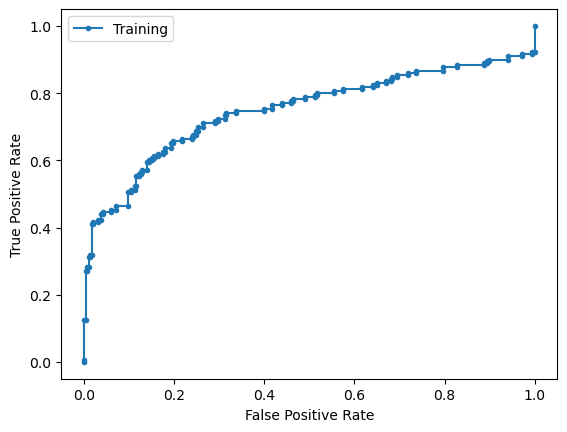


Confusion Matrix: 
[[284   1]
 [ 66 104]]

For Test data: 

ROC: 


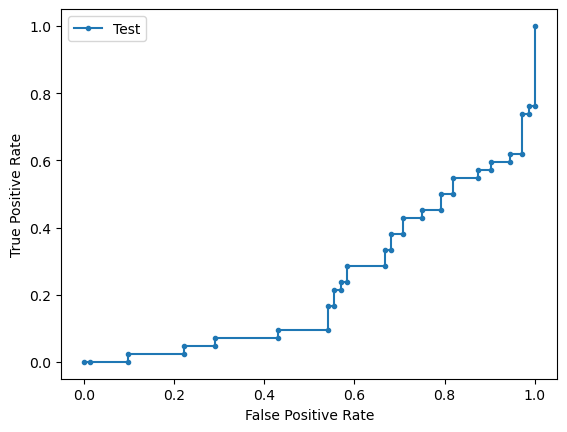


Confusion Matrix: 
[[ 0 72]
 [26 16]]


In [19]:
unsuper_result = kmeans_monte_carlo()

In [20]:
df_unsuper_train = pd.DataFrame(unsuper_result[0], columns = column_list)
df_unsuper_test = pd.DataFrame(unsuper_result[1], columns= column_list)

In [21]:
df_unsuper_train.mean()

Accuracy     0.850842
Precision    0.991966
Recall       0.605686
F1           0.751957
AUC          0.520095
dtype: float64

In [22]:
df_unsuper_test.mean()

Accuracy     0.445906
Precision    0.529653
Recall       0.468254
F1           0.457509
AUC          0.222817
dtype: float64

## Conclusion for Supervised, Semi-supervised, and Unsupervised


As expected, regardless of the method, the scores for test set were lower than that of training set. <br>
Moreover, Supervised Training outperformed Semi-Supervised Training in all measures, both in training and test set. <br>
Laslty, also expected, Unsupervised Training underperformed compared to the other methods. While various metrics were quite stable for Supervised and Semi-Supervised training, metrics from Unsupervised were various and low. 

In [23]:
d1 = df_supervised_train.mean()
d2 = df_supervised_test.mean()
d3 = df_semi_train.mean()
d4 = df_semi_test.mean()
d5 = df_unsuper_train.mean()
d6 = df_unsuper_test.mean()
d_list = [d1,d2,d3,d4,d5,d6]
df_result = pd.DataFrame(d_list)
df_result['Index'] = ['Supervised Train','Supervised Test','Semi-supervised Train','Semi-supervised Test','Unsupervised Train','Unsupervised Test']
df_result.set_index('Index')

,Accuracy,Precision,Recall,F1,AUC
Index,,,,,
Supervised Train,0.984469,0.989415,0.968824,0.978989,0.997198
Supervised Test,0.972515,0.980076,0.945238,0.961958,0.993948
Semi-supervised Train,0.976630,0.983536,0.953529,0.968216,0.994549
Semi-supervised Test,0.966082,0.967784,0.940476,0.953160,0.989517
Unsupervised Train,0.850842,0.991966,0.605686,0.751957,0.520095
Unsupervised Test,0.445906,0.529653,0.468254,0.457509,0.222817
